## Problem 1
### The graph of a cubic function passes through the points $(-3, 6.8),(0.5,14.5),(2,-21.2)$, and $(5,10)$.

##### (a) Write the cubic expression as $f=ax^3+bx^2+cx+d$ and solve a system of equations to find the coefficients (do NOT use curve-fitting!)

In [1]:
from sympy import * # this way I don't even need to type sp (cuz I'm lazy)

# list of points (x, y)
points = [(-3, 6.8), (0.5, 14.5), (2, -21.2), (5, 10)]

# matrix representation of the system of equations
M = Matrix([[point[0]**3, point[0]**2, point[0], 1, point[1]] for point in points])
display(M)

Matrix([
[  -27,    9,  -3, 1,   6.8],
[0.125, 0.25, 0.5, 1,  14.5],
[    8,    4,   2, 1, -21.2],
[  125,   25,   5, 1,    10]])

To find the coefficients of the cubic equation, we use the included reduce row echelon form (rref) function of the matrix that's included by the sympy library

In [2]:
M_rref = M.rref()
display(M_rref[0])

Matrix([
[1, 0, 0, 0,   1.6],
[0, 1, 0, 0,  -4.4],
[0, 0, 1, 0, -21.2],
[0, 0, 0, 1,  26.0]])

Thus we have our coefficients, and our function is

In [3]:
x = symbols('x')
f = 1.6*x**3 -4.4*x**2 - 21.2*x + 26
display(f)

1.6*x**3 - 4.4*x**2 - 21.2*x + 26

##### (b) Use the symbolic plot command to plot the function on the domain $x \in [-4,6]$

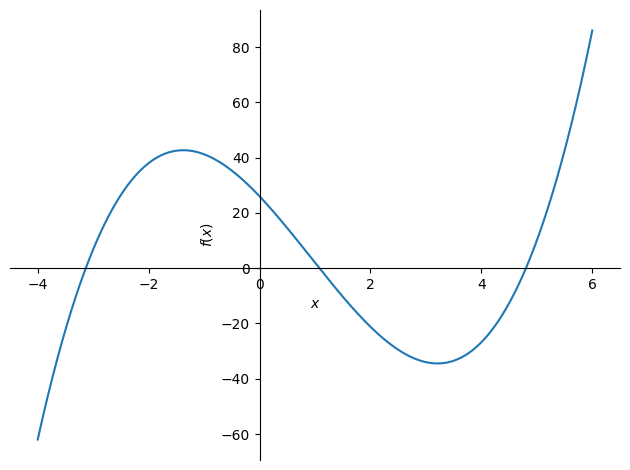

In [4]:
plot(f, (x, -4, 6))

##### (c) Use Python to find the local extrema and the inflection point. Express your answers in point form. Then show that the $x$-coordinate of the inflection point is the average of the $x$-coordinates of the local extrema.

We first calculate the first derivative and set it to 0 to find the critical points

In [5]:
fp = diff(f, x) # first derivative
print(f"the first derivative of the function is {fp}")

crit_pts = solve(fp, x) # solving the first derivative for 0 gives us the critical points

for crit_pt in crit_pts:
  y_val = f.evalf(subs={x: crit_pt}) # y value of the function at the critical point
  print(f"{(crit_pt, y_val)} is a critical point of the function")

the first derivative of the function is 4.8*x**2 - 8.8*x - 21.2
(-1.37613608203293, 42.6718892021985) is a critical point of the function
(3.20946941536627, -34.4681854984948) is a critical point of the function


Then we calculate the second derivative and evaluate it at the critical points to determine if they are local minima or maxima, as well as set it to 0 to find the inflection point(s)

In [6]:
fpp = diff(f, x, 2) # second derivative
print(f"the second derivative of the function is {fpp}")

for crit_pt in crit_pts:
  val_at_cp = fpp.evalf(subs={x: crit_pt})
  if val_at_cp > 0:
    print(f"x = {crit_pt} is a local minimum since the second derivative {val_at_cp} > 0")
  elif val_at_cp < 0:
    print(f"x = {crit_pt} is a local maximum since the second derivative {val_at_cp} < 0")
  elif val_at_cp == 0:
    print(f"We don't know what x = {crit_pt} is, since the second derivative is {val_at_cp} = 0")

the second derivative of the function is 9.6*x - 8.8
x = -1.37613608203293 is a local maximum since the second derivative -22.0109063875162 < 0
x = 3.20946941536627 is a local minimum since the second derivative 22.0109063875162 > 0


In [7]:
infl_pts = solve(fpp, x) # solving the second derivative for 0 gives us the inflection points

for infl_pt in infl_pts:
  y_val = f.evalf(subs={x: infl_pt}) # y value of the function at the inflection point
  print(f"{(infl_pt, y_val)} is an inflection point of the function")

avg_crit_pts = sum(crit_pts) / len(crit_pts) # the arithmetic mean of the x values of the critical points
print(f"{avg_crit_pts} is the arithmetic mean of the x values of the critical points")

print("By inspection, they look the same, but in general it is bad practice to check for equality of floats")
print(f"For instance if you evaluate (0.1+0.2) == 0.3 you get {(0.1+0.2) == 0.3}")

(0.916666666666667, 4.10185185185185) is an inflection point of the function
0.916666666666667 is the arithmetic mean of the x values of the critical points
By inspection, they look the same, but in general it is bad practice to check for equality of floats
For instance if you evaluate (0.1+0.2) == 0.3 you get False


##### (d) Find the equation of the line tangent to the curve at $x=2$ and replot the curve and the tangent line on the same axes

The slope of the tangent line at $x=2$ is just the derivative evaluated at $x=2$. We can then find the equation of the line by solving for the constant term that matches the function at the same point.

In [8]:
slope = fp.evalf(subs={x: 2})
y_val = f.evalf(subs={x: 2})
const_term = y_val - slope*2
tan_line_at_2 = slope*x + const_term
print(f"The tangent line at x=2 is {tan_line_at_2}")

The tangent line at x=2 is 18.0 - 19.6*x


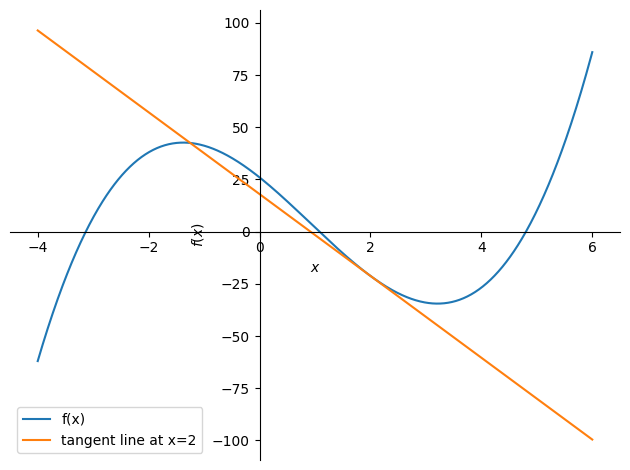

In [9]:
p1 = plot(f, (x, -4, 6), show=False, legend = True, label='f(x)')
p2 = plot(tan_line_at_2, (x, -4, 6), show=False, legend = True, label='tangent line at x=2')
p1.append(p2[0])
p1.show()

## Problem 2
### Given the functions $f(x) = x^3-x^2 -2x+1$ and $g(x) = x^2-2$ (NOTE: approximate answers are sufficient):

#### (a) Plot both functions and the line $y=2$ on the same set of axes using the domain $x \in [-2, 3]$.

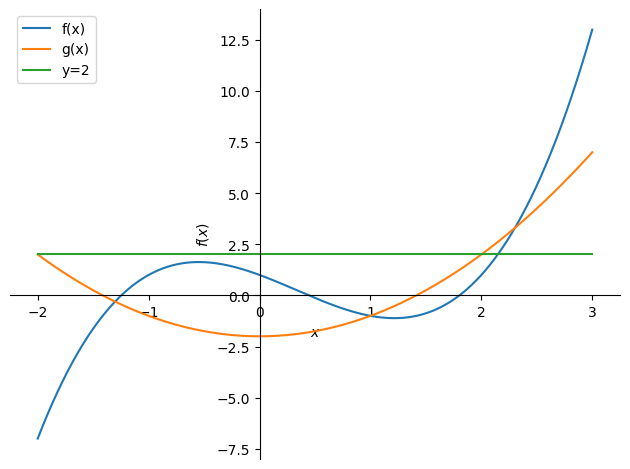

In [10]:
f = x**3 - x**2 -2*x + 1
g = x**2 - 2
p1 = plot(f, (x, -2, 3), show=False, legend=True, label='f(x)')
p2 = plot(g, (x, -2, 3), show=False, legend=True, label='g(x)')
p3 = plot(2, [x, -2, 3], show=False, legend=True, label='y=2')
p1.append(p2[0])
p1.append(p3[0])
p1.show()

#### (b) Find (approximately) the total area of the regions bounded by these functions.

First let's find the points of intersection of the two functions.

In [11]:
meet_pts = solve(f - g, x) # solving the equation f(x) - g(x) = 0 gives us the points where they intersect
for meet_pt in meet_pts:
    y_val = f.evalf(subs={x: meet_pt}) # y value of the function at the meeting point
    print(f"{(meet_pt, y_val)} is an intersection point of the functions f and g")

(1, -1.00000000000000) is an intersection point of the functions f and g
(1/2 - sqrt(13)/2, -0.302775637731995) is an intersection point of the functions f and g
(1/2 + sqrt(13)/2, 3.30277563773199) is an intersection point of the functions f and g


We see that the intersection points are not from left to right, so we first sort them. Then, we can integrate the difference of the two functions from the sorted points to find the area.

In [12]:
meet_pts.sort() # sorting the intersection points from left to right

# finding the area between two curves
area1 = integrate(f - g, (x, meet_pts[0], meet_pts[1]))
print(f"The left area bounded by the curves f and g is {(area1).evalf()}")
area2 = integrate(g - f, (x, meet_pts[1], meet_pts[2]))
print(f"The right area bounded by the curves f and g is {(area2).evalf()}")
print(f"The total area bounded by the curves f and g is {(area1 + area2).evalf()}")

The left area bounded by the curves f and g is 4.99467360754299
The right area bounded by the curves f and g is 1.08865972579034
The total area bounded by the curves f and g is 6.08333333333333


#### (c) Find the volume obtained by rotating the first region about the line y=2

This is finding the volume of the solid of revolution to the axis of rotation ($y=2$). We find this using the washer method, where $$V = \pi \int_a^b{(R^2 - r^2)dx},$$
where $R$ is the outer radius, and $r$ is the inner radius. In this case we see from the graph that $2-g$ is the outer radius and $2-f$ is the inner radius.

In [13]:
R = 2 - g
r = 2 - f
V1 = pi * integrate(R**2 - r**2, (x, meet_pts[0], meet_pts[1]))
print(f"The volume of the solid of revolution is {(V1).evalf()}")

The volume of the solid of revolution is 73.3384072392264


As a bonus, we can even plot this solid by using the `plot_3d_parametric_surface` function:

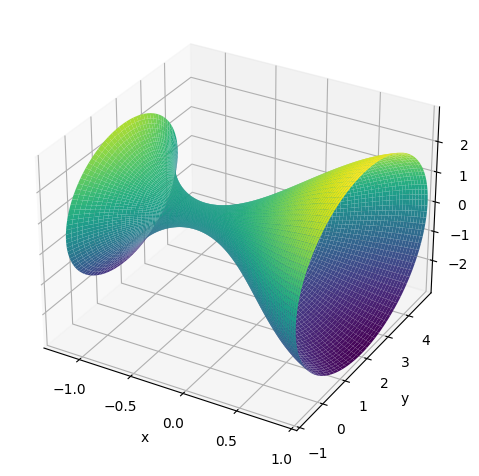

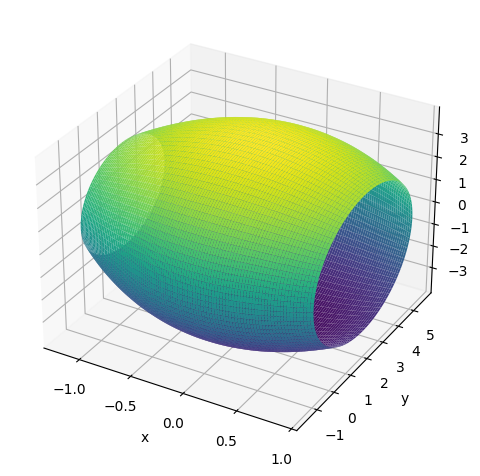

In [23]:
from sympy.plotting import plot3d_parametric_surface # apparently the original import didn't include this function

t = symbols('t')

# Parametric equations for f
X_f = x
Y_f = 2 + (f-2)*cos(t)
Z_f = (f-2)*sin(t)

surf_f = plot3d_parametric_surface(
    X_f, Y_f, Z_f,
    (x, meet_pts[0], meet_pts[1]),
    (t, 0, 2*pi),
)

# Parametric equations for g
X_g = x
Y_g = 2 + (g-2)*cos(t)
Z_g = (g-2)*sin(t)

surf_g = plot3d_parametric_surface(
    X_g, Y_g, Z_g,
    (x, meet_pts[0], meet_pts[1]),
    (t, 0, 2*pi),
)

#### (d) Find the volume obtained by rotating the second region about the $y$-axis.

Again we want to find the volume of a solid of revolution to a different axis of rotation ($x=0$). In this case, the shell method is more appropriate, where $$V = 2\pi \int_a^b{r(x)h(x)dx},$$ 
and $r(x)$ is the distance from the axis of rotation to $x$, and $h(x)$ is the height of the solid at $x$. In our case, $r(x) = x$ and $h(x) = g(x) - f(x)$.

In [15]:
r = x
h = g - f
V2 = 2*pi * integrate(r * h, (x, meet_pts[1], meet_pts[2]))
print(f"The volume of the solid of revolution is {(V2).evalf()}")

The volume of the solid of revolution is 11.4923996945017


We can also plot this as well:

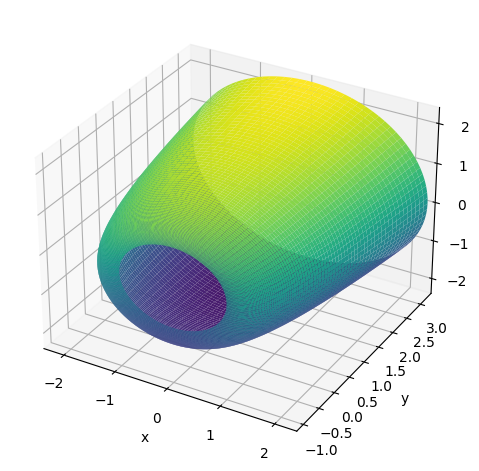

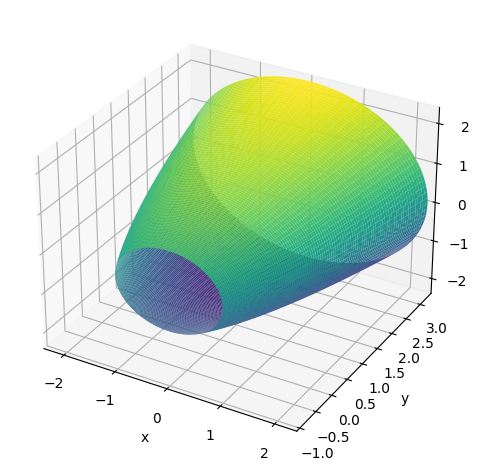

In [24]:
# Parametric equations for the lower-curve f(x)
X_f = x*cos(t)
Y_f = f
Z_f = x*sin(t)

surf_f = plot3d_parametric_surface(
    X_f, Y_f, Z_f,
    (x, meet_pts[1], meet_pts[2]),
    (t, 0, 2*pi),
)

# Parametric equations for the upper-curve g(x)
X_g = x*cos(t)
Y_g = g
Z_g = x*sin(t)

surf_g = plot3d_parametric_surface(
    X_g, Y_g, Z_g,
    (x, meet_pts[1], meet_pts[2]),
    (t, 0, 2*pi),
)

## Problem 3 
### Given the power series $\sum_{n=0}^\infty{\frac{(-1)^n(\ln(2)\cdot x)^n}{n!}}$:

#### (a) Let $x = \frac{1}{2}$. Plot the first 21 terms of the series and the first 21 partial sums on the same axes ($n=0$ to $n=20$).

It looks like the default `plot` function in sympy doesn't allow us to plot coordinates, so we will use matplotlib to plot them instead

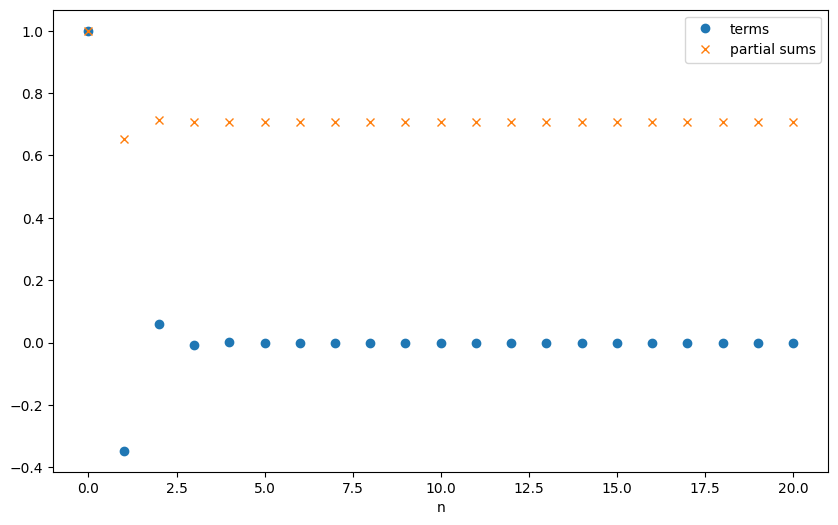

In [30]:
import matplotlib.pyplot as plt

n_range = range(21)  # n from 0 to 20
terms = [(-1)**n * (ln(2)*0.5)**n / factorial(n) for n in n_range] # first 21 terms of the series
partial_sums = [sum(terms[:n+1]) for n in n_range] # first 21 partial sums of the series

plt.figure(figsize=(10, 6))
plt.plot(n_range, terms, 'o', label="terms")
plt.plot(n_range, partial_sums, 'x', label=f"partial sums")
plt.xlabel('n')
plt.legend()
plt.show()

#### (b) Continue with $x=\frac{1}{2}$. Determine the number of terms needed to sum the series to within $10^{-8}$. Find this approximation and the exact sum of the series to verify this.
#### (**HINT**: you will not be able to solve or nsolve the error bound equation, so replot the terms with an appropriate $y$-range to graphically find the number of terms).

This power series looks suspiciously similar to that of 
$$e^x = \sum_{n=0}^\infty {\frac{x^n}{n!}},$$
and we can rewrite it to
$$\sum_{n=0}^\infty {\frac{-(\ln(2)x)^n}{n!}}$$
which is just
$$e^{-\ln(2)x} = 2^{-x}$$

In [ ]:
exact_sum = 2**(-1/2) # exact value of the series when x = 0.5
